In [2]:
# P2_Exercise_10.ipynb
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN

In [3]:
#1
#load the dataset
print("Loading equipment anomaly dataset...")
df = pd.read_csv(r"C:\Users\siona\Desktop\Projects\INFO_4000\Week 10\Exercise\Attempt\equipment_anomaly_data.csv")

#verifying data imports correctly
print(f"Dataset shape: {df.shape}") #shape
print(f"\nFirst rows:")
print(df.head()) #head

print(f"\nColumn names: {df.columns.tolist()}") #column names

Loading equipment anomaly dataset...
Dataset shape: (7672, 7)

First rows:
   temperature   pressure  vibration   humidity   equipment       location  \
0    58.180180  25.029278   0.606516  45.694907     Turbine        Atlanta   
1    75.740712  22.954018   2.338095  41.867407  Compressor        Chicago   
2    71.358594  27.276830   1.389198  58.954409     Turbine  San Francisco   
3    71.616985  32.242921   1.770690  40.565138        Pump        Atlanta   
4    66.506832  45.197471   0.345398  43.253795        Pump       New York   

   faulty  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0  

Column names: ['temperature', 'pressure', 'vibration', 'humidity', 'equipment', 'location', 'faulty']


In [4]:
#2
#select features for anomaly detection
features_to_use = ['temperature', 'pressure', 'vibration', 'humidity']
X = df[features_to_use].values #features
y_true = df['faulty'].values #labels

print(f"\nSelected features: {features_to_use}") 
print(f"Actual faulty equipment: {y_true.sum()}")


Selected features: ['temperature', 'pressure', 'vibration', 'humidity']
Actual faulty equipment: 767.0


In [5]:
#3
#preprocess data 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
#4
#apply PCA for 2D visualization
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X_scaled) #fit and transform

print(f"PCA explained variance: {sum(pca.explained_variance_ratio_):.2%}")

PCA explained variance: 53.41%


In [ ]:
#5
# DBSCAN parameters
dbscan = DBSCAN(eps=0.5, min_samples=5) #eps=0.5, min_samples=5 
labels = dbscan.fit_predict(X_2d)

#evaluate DBSCAN
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_anomalies = list(labels).count(-1)

#counting the clusters and anomalies
print(f"\nClusters found: {n_clusters}")
print(f"Anomalies detected: {n_anomalies} ({n_anomalies/len(labels)*100:.1f}%)")


Clusters found: 1
Anomalies detected: 37 (0.5%)


C:\Users\siona\AppData\Local\Temp\ipykernel_3036\243927610.py:21: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax2.scatter(X_2d[mask, 0], X_2d[mask, 1], c=col, marker=marker, s=50, label=label, edgecolor='k', alpha=0.8)


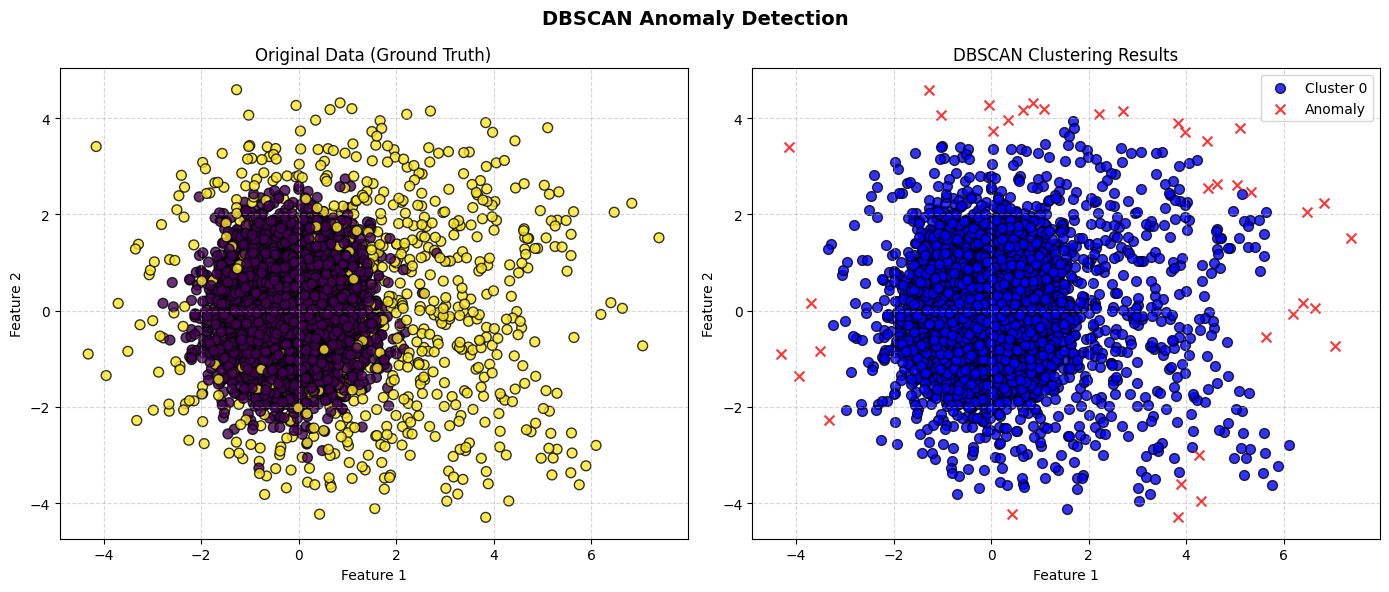

Estimated number of clusters: 1
Estimated number of noise points (anomalies): 37


In [ ]:
#6
#plotting before and after
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

#first plot: "Original Data (Ground Truth)""
ax1.scatter(X_2d[:, 0], X_2d[:, 1], c=y_true, cmap='viridis', s=50, edgecolor='k', alpha=0.8)
ax1.set_title('Original Data (Ground Truth)')
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')
ax1.grid(True, linestyle='--', alpha=0.5)

#second plot: "DBSCAN Results"
colors = ['blue', 'green', 'orange', 'purple']
for k in set(labels):
    if k == -1:
        col, marker, label = 'red', 'x', 'Anomaly'
    else:
        col, marker, label = colors[k % len(colors)], 'o', f'Cluster {k}'
    
    mask = (labels == k)
    ax2.scatter(X_2d[mask, 0], X_2d[mask, 1], c=col, marker=marker, s=50, label=label, edgecolor='k', alpha=0.8)

ax2.set_title('DBSCAN Clustering Results')
ax2.set_xlabel('Feature 1')
ax2.set_ylabel('Feature 2')
ax2.legend()
ax2.grid(True, linestyle='--', alpha=0.5)

plt.suptitle('DBSCAN Anomaly Detection', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Summary 
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

#for counting the clusters and anomalies
print(f"Estimated number of clusters: {n_clusters}")
print(f"Estimated number of noise points (anomalies): {n_noise}")

In [11]:
#7
#analyze the resutls
anomalies = (labels == -1)
print("Feature Statistics: Normal vs Anomalies\n")

#calculate the mean for each feature
for feature in features_to_use:
    normal_mean = df[~anomalies][feature].mean()
    anomaly_mean = df[anomalies][feature].mean()
    print(f"{feature}: Normal={normal_mean:.2f}, Anomaly={anomaly_mean:.2f}")

Feature Statistics: Normal vs Anomalies

temperature: Normal=70.82, Anomaly=91.23
pressure: Normal=35.71, Anomaly=40.97
vibration: Normal=1.60, Anomaly=3.23
humidity: Normal=49.95, Anomaly=64.29
